In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cifar=keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

In [4]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst
train_images_gray=grayscale(train_images)
test_images_gray=grayscale(test_images)
img_channels=1

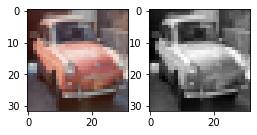

In [5]:
img = 64
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(train_images[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(train_images_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

In [6]:
train_images_gray=train_images_gray/255
test_images_gray=test_images_gray/255

Using TensorFlow backend.


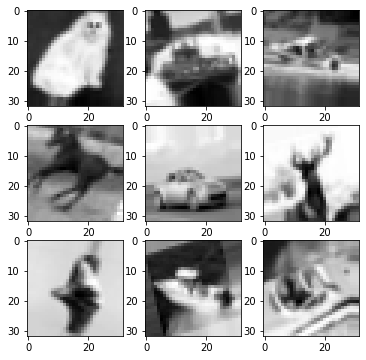

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rotation_range=20, \
                             width_shift_range=0.1, \
                             height_shift_range=0.1, \
                             shear_range=0.1, \
                             zoom_range=0.2, \
                             horizontal_flip=True, \
                             fill_mode='nearest')

plt.figure(figsize=(6, 6))
(X_batch, Y_batch) = datagen.flow(train_images_gray, train_labels, batch_size=9).next()
for i in range(9):
    plt.subplot(3, 3, (i + 1))
    plt.imshow(X_batch[i, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0706 14:09:15.361398  9532 deprecation.py:506] From C:\Users\Prajwal\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1628: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images_gray, train_labels, epochs=5)

W0706 14:09:27.386362  9532 deprecation.py:323] From C:\Users\Prajwal\Anaconda3\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:460: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 147us/sample - loss: 2.0611 - acc: 0.2535
Epoch 2/5
50000/50000 [==============================] - 4s 86us/sample - loss: 1.9421 - acc: 0.3042
Epoch 3/5
50000/50000 [==============================] - 4s 86us/sample - loss: 1.8869 - acc: 0.3258
Epoch 4/5
50000/50000 [==============================] - 4s 86us/sample - loss: 1.8507 - acc: 0.3437
Epoch 5/5
50000/50000 [==============================] - 4s 86us/sample - loss: 1.8254 - acc: 0.3531


In [11]:
test_loss, test_acc = model.evaluate(test_images_gray, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 145us/sample - loss: 1.8318 - acc: 0.3537
Test accuracy: 0.3537
